In [10]:
# @author: Digital Whisper



from urllib.request import urlopen, Request
from bs4 import BeautifulSoup


finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN','GOOG' ] # , 'FB', 'AAPL', 'TSLA'

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'stock-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table
    print
    print(news_tables[ticker])
    #break
    

<table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Apr-11-21 10:34AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/more-than-just-food-door-dash-grubhub-uber-eats-adapted-to-covid-19-now-plot-next-moves-143421945.html" target="_blank">More than just food: DoorDash, Grubhub, Uber Eats adapted to COVID-19, now plot next moves</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Yahoo Finance</span></div></div></td></tr>
<tr><td align="right" width="130">10:03AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2021/04/11/better-buy-amazon-vs-kroger/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="

<table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Apr-10-21 06:33PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.investors.com/research/best-robinhood-stocks-to-buy-now/?src=A00220" target="_blank">These Are The Best Robinhood Stocks To Buy Or Watch Now</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Investor's Business Daily</span></div></div></td></tr>
<tr><td align="right" width="130">12:05PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/benzingas-bulls-bears-week-apple-160530743.html" target="_blank">Benzinga's Bulls And Bears Of The Week: Apple, Chevron, GM, GE, Peloton And More</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:

In [11]:
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])
        print(parsed_data)

[['AMZN', 'Apr-11-21', '10:34AM\xa0\xa0', 'More than just food: DoorDash, Grubhub, Uber Eats adapted to COVID-19, now plot next moves']]
[['AMZN', 'Apr-11-21', '10:34AM\xa0\xa0', 'More than just food: DoorDash, Grubhub, Uber Eats adapted to COVID-19, now plot next moves'], ['AMZN', 'Apr-11-21', '10:03AM\xa0\xa0', 'Better Buy: Amazon vs. Kroger']]
[['AMZN', 'Apr-11-21', '10:34AM\xa0\xa0', 'More than just food: DoorDash, Grubhub, Uber Eats adapted to COVID-19, now plot next moves'], ['AMZN', 'Apr-11-21', '10:03AM\xa0\xa0', 'Better Buy: Amazon vs. Kroger'], ['AMZN', 'Apr-11-21', '10:00AM\xa0\xa0', 'Amazon Workers Mostly Back to Offices by Fall: Will Other Companies Follow?']]
[['AMZN', 'Apr-11-21', '10:34AM\xa0\xa0', 'More than just food: DoorDash, Grubhub, Uber Eats adapted to COVID-19, now plot next moves'], ['AMZN', 'Apr-11-21', '10:03AM\xa0\xa0', 'Better Buy: Amazon vs. Kroger'], ['AMZN', 'Apr-11-21', '10:00AM\xa0\xa0', 'Amazon Workers Mostly Back to Offices by Fall: Will Other Compan

In [16]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

df=pd.DataFrame(parsed_data,columns=['ticker', 'date', 'time', 'title'])

vader=SentimentIntensityAnalyzer()

f =lambda title: vader.polarity_scores(title)['compound']
df['compound']=df['title'].apply(f)
#print(vader.polarity_scores("fuck , cuntlike crazy now "))
#print(df['title'])
#f =lambda title: vader.polarity_scores(title)['neg']
#df['neg']=df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date
#print(df.columns[3])
print(df['ticker'].head())

0    AMZN
1    AMZN
2    AMZN
3    AMZN
4    AMZN
Name: ticker, dtype: object


<Figure size 720x576 with 0 Axes>

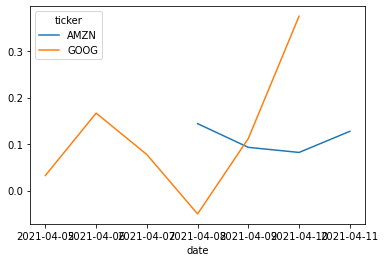

In [18]:
#visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

mean_df =df.groupby(['ticker','date']).mean()
mean_df = mean_df.unstack() 
mean_df = mean_df.xs('compound',axis= 'columns').transpose()
mean_df.plot(kind ='line')
#mean_df.plot(kind ='bar')
plt.show()
#print(mean_df)         
#print( df[df.isnull()] )   